<a href="https://colab.research.google.com/github/pramod225/Artificial-intelligence/blob/master/loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#there are  used four algorithms on loan data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [0]:
data=pd.read_csv('train_AV3.csv')

In [439]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [440]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [441]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [442]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [443]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

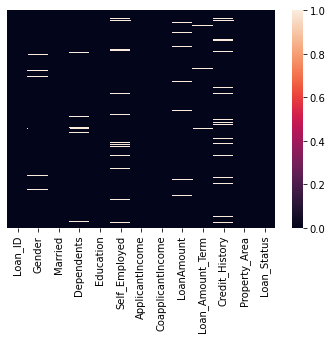

In [444]:
sns.heatmap(data.isnull(),yticklabels=False)

In [445]:
data.drop(['Loan_ID','Married','Dependents','Education'],axis=1)

,Gender,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,Female,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [446]:
sex=pd.get_dummies(data['Gender'],drop_first=True)
sex

,Male
0,1
1,1
2,1
3,1
4,1
...,...
609,0
610,1
611,1
612,1


In [447]:
area=pd.get_dummies(data['Property_Area'],drop_first=True)
area


,Semiurban,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
609,0,0
610,0,0
611,0,1
612,0,1


In [448]:
loan=pd.get_dummies(data['Loan_Status'],drop_first=True)
loan


,Y
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [449]:
self_emp=pd.get_dummies(data['Self_Employed'],drop_first=True)
self_emp


,Yes
0,0
1,0
2,1
3,0
4,0
...,...
609,0
610,0
611,0
612,0


In [0]:
data=pd.concat([data,sex,area,self_emp,loan],axis=1)

In [0]:
data.drop(['Loan_ID','Gender','Married','Dependents','Education','Property_Area','Loan_Status','Self_Employed'],axis=1,inplace=True)


In [452]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Semiurban,Urban,Yes,Y
0,5849,0.0,NaN,360.0,1.0,1,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,1,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,1


In [0]:
data.fillna(data.mean().round(3),inplace=True)

In [454]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Semiurban,Urban,Yes,Y
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014471,0.013933,-0.014246,-0.000598,0.127180,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001681,0.082316,-0.027044,0.022776,-0.016100,-0.059187
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007746,0.064609,-0.008273,-0.033220,0.115260,-0.036416
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001397,-0.070179,0.061365,-0.096683,-0.033943,-0.020974
Credit_History,-0.014471,-0.001681,-0.007746,0.001397,1.000000,0.025107,0.040763,-0.022628,-0.002260,0.540478
Male,0.013933,0.082316,0.064609,-0.070179,0.025107,1.000000,-0.113069,0.044109,-0.027421,0.025407
Semiurban,-0.014246,-0.027044,-0.008273,0.061365,0.040763,-0.113069,1.000000,-0.547574,0.008710,0.136540
Urban,-0.000598,0.022776,-0.033220,-0.096683,-0.022628,0.044109,-0.547574,1.000000,-0.030338,-0.043621
Yes,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.027421,0.008710,-0.030338,1.000000,-0.003700
Y,-0.004710,-0.059187,-0.036416,-0.020974,0.540478,0.025407,0.136540,-0.043621,-0.003700,1.000000


In [455]:
data.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Male                 0
Semiurban            0
Urban                0
Yes                  0
Y                    0
dtype: int64

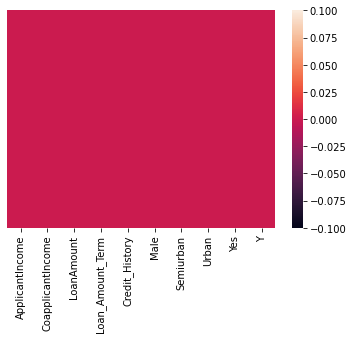

In [456]:
sns.heatmap(data.isnull(),yticklabels=False)

In [0]:
x=data.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values
y=data.iloc[:,9].values

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

Apply LogisticRegression

In [0]:
logmodel=LogisticRegression()

In [460]:
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [461]:
pred=logmodel.predict(x_test)
pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1],
      dtype=uint8)

In [462]:
y_test

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1],
      dtype=uint8)

In [463]:
logmodel.score(x_test,y_test)

1.0

In [464]:
cm=confusion_matrix(y_test,pred)
cm

array([[ 49,   0],
       [  0, 105]])

In [465]:
accuracy_score(y_test,pred)

1.0

Apply Decision Tree


In [466]:
tree=DecisionTreeRegressor(random_state=42)
tree.fit(x_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [467]:
dpred=tree.predict(x_test)
dpred

array([0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1.])

In [468]:
y_test

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1],
      dtype=uint8)

In [469]:
cmd=confusion_matrix(y_test,dpred)
cmd

array([[ 49,   0],
       [  0, 105]])

In [470]:
accuracy_score(y_test,dpred)

1.0

Support vector Machine

In [471]:
cls=SVC(kernel='linear',random_state=1)
cls.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [472]:
spred=cls.predict(x_test)
spred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1],
      dtype=uint8)

In [473]:
cms=confusion_matrix(y_test,spred)
cms

array([[ 44,   5],
       [  2, 103]])

In [474]:
accuracy_score(y_test,spred)

0.9545454545454546

KNN

In [475]:
kcls=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
kcls.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [476]:
kpred=kcls.predict(x_test)
kpred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=uint8)

In [477]:
y_test

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1],
      dtype=uint8)

In [478]:
cmk=confusion_matrix(y_test,kpred)
cmk

array([[ 6, 43],
       [16, 89]])

In [479]:
accuracy_score(y_test,kpred)

0.6168831168831169